# Model Training
This notebook trains the below mentioned models.

1. Linear model(stochastic gradient descent (SGD) Classifier)
2. Linear model(LinearSVC classifier)
3. Neural Network model(Multi-layer Perceptron classifier)

All the cells of this notebook, can be executed in a single run. The dimensionality reduction block is not needed 
if the data files (xtraindr.pkl, xvaldr.pkl, xtestdr.pkl) are loaded from its corresponding pickle files in 
"Loading pickle files" section.


In [ ]:
from pprint import pprint
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
%matplotlib inline

# Loading Pickle files

The following data are stored as pickled files for future use. 
1. cleaned training data
2. cleaned test data
3. training labels (yactual)
4. test labels (ytest)
5. tfidf vectors of all data (train_tfidf, test_tfidf, val_tfidf)

Storing pickle files helps to easily load the data for later use without executing all the code snippets again.

In [2]:
#Reading pickled train data
with open ('/data/cmpe297-F2020-guzun/yelp/pickle-files/yelptraindata1.pkl', 'rb') as fp:
    train_data = pickle.load(fp)

train_data[:10]

['dismal lukewarm glop waiter manager see us barely nibble entree plate shove forward pickup thank us perfunctorily patronage hill country jail serve grub bad protection never never never back yard house real food',
 'love really atmosphere cozy festive shrimp house fry fry sometimes good sometimes great spicy dipping sauce come die beer list amazing cocktail great price cheap dive go every week rather treat try will not disappoint',
 'actually horrify place still business year old son need haircut past summer lure cut sign get door wait minute stylist work people place total garbage tacky sofa time sofa giant son notice ant crawl floor furniture disgusting walk actually turn around walk upon enter do not old black male stylist finish haircut turn tell want clipper around back side hand cut top standard boy cut really freak simple right wrong rather use clipper go actually cut hair go use move downward do not cut hair rub man allege cosmetology license know use set clipper realize almo

In [3]:
#Reading pickled test data
with open ('/data/cmpe297-F2020-guzun/yelp/pickle-files/yelptestdata1.pkl', 'rb') as fp:
    xtest = pickle.load(fp)

xtest[:10]

['go bunch friend amazing time diva fun show professional cast dancer together th queen true character blow us away frank us laugh entire show well would advise anyone everyone come show',
 'place amazing fry chicken good day get rice come piece chicken purple rice delicious can not describe super crispy also super juicy drizzle chicken sauce like mayonnaise blow mind excited eat forget take picture fear ill back sure',
 ' year old washing machine repair actually good experience call late yesterday come today time say would think serviceman positive anyway super courteous waste time find problem show debris line water backing definitely recommend affordable appliance use hopefully will not need near future also service fee go toward repair lot less company call',
 'broil haddock good stuff mushroom outstanding good brandy old fashioned obviously popular destination make reservation content mill around bar bit nice atmosphere work casual night right water go back',
 'love bar bartender 

In [4]:
#loading stored training and test labels
yactual = pickle.load(open("/data/cmpe297-F2020-guzun/yelp/pickle-files/yelptrainlabels.pkl", "rb"))
print(f"The length of training labels is {len(yactual)}")
ytest = pickle.load(open("/data/cmpe297-F2020-guzun/yelp/pickle-files/yelptestlabels.pkl", "rb"))
print(f"The length of test labels is {len(ytest)}")

The length of training labels is 599995
The length of test labels is 149995


In [5]:
#loading data tfidf vectors
xtrain_tfidf = pickle.load(open("/data/cmpe297-F2020-guzun/yelp/pickle-files/train_tfidf.pkl", "rb"))
xval_tfidf = pickle.load(open("/data/cmpe297-F2020-guzun/yelp/pickle-files/val_tfidf.pkl", "rb"))
xtest_tfidf = pickle.load(open("/data/cmpe297-F2020-guzun/yelp/pickle-files/test_tfidf.pkl", "rb"))

In [6]:
xtraindr = pickle.load(open("/data/cmpe297-F2020-guzun/yelp/pickle-files/xtraindr.pkl", "rb"))
print(f"xtraindr shape: {xtraindr.shape}")
xvaldr = pickle.load(open("/data/cmpe297-F2020-guzun/yelp/pickle-files/xvaldr.pkl", "rb"))
print(f"xvaldr shape: {xvaldr.shape}")
xtestdr = pickle.load(open("/data/cmpe297-F2020-guzun/yelp/pickle-files/xtestdr.pkl", "rb"))
print(f"xtestdr shape: {xtestdr.shape}")

xtraindr shape: (479996, 100)
xvaldr shape: (119999, 100)
xtestdr shape: (149995, 100)


In [7]:
print(f"xtraindr shape: {xtraindr.shape}")
print(f"xvaldr shape: {xvaldr.shape}")
print(f"xtestdr shape: {xtestdr.shape}")

xtraindr shape: (479996, 100)
xvaldr shape: (119999, 100)
xtestdr shape: (149995, 100)


# Train test split

In [8]:
#splitting into training and validation data
from sklearn.model_selection import train_test_split

xtrain, xval, ytrain, yval = train_test_split(train_data, yactual, test_size=0.2, random_state=42)
#TODO: not sure of using shape, need to verify that
# print(xtrain.shape)
# print(xval.shape)
# print(ytrain.shape)
# print(yval.shape)

In [9]:
print(f"The length of the training data is {len(xtrain)}")
print(f"The length of the validation data is {len(xval)}")

The length of the training data is 479996
The length of the validation data is 119999


In [10]:
#shape of tfidf vectors
print(f"training vectors shape: {xtrain_tfidf.shape}")
print(f"validation vectors shape: {xval_tfidf.shape}")
print(f"testing vectors shape: {xtest_tfidf.shape}")

training vectors shape: (479996, 32891)
validation vectors shape: (119999, 32891)
testing vectors shape: (149995, 32891)


# Model performance analysis

In [11]:
# Squared error
# Regression error metrics
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

def evaluate_model(ytrain, ypred):
    mse = mean_squared_error(ytrain, ypred)
    print(f"Mean squared error: {mse}")
    rmse = np.sqrt(mse)
    print(f"root mean squared error: {rmse}")
    mae = mean_absolute_error(ytrain, ypred)
    print(f"Mean absolute error: {mae}")
    r2 = r2_score(ytrain, ypred)
    print(f"r2 score: {r2}")
    rmse= np.sqrt(mse)
    print(f"rmse score:{rmse}")

    return rmse,mse, mae, r2

# Buliding Regression models

In [12]:
from sklearn.pipeline import Pipeline

#preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
#from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import MaxAbsScaler

#dimensionality reduction
from sklearn.decomposition import SparsePCA,PCA,TruncatedSVD

#Regression algorithms
from sklearn.linear_model import SGDClassifier
from sklearn import svm
from sklearn.svm import SVR
from sklearn.neighbors import (KNeighborsClassifier,KNeighborsRegressor)
from sklearn.neighbors import NearestNeighbors
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVR,SVC,LinearSVC

# Classifier Definition

In [13]:
def get_classifier(classifier="LogR", arguments = None):
  classifier_dict = {
      "SGD" : SGDClassifier(max_iter=1000, tol=1e-3,random_state=42),
      "NN"  : KNeighborsRegressor(n_neighbors=5, radius=100.0,  leaf_size=30, metric='minkowski', p=2,  n_jobs=10),
      "MLP" : MLPClassifier(random_state=42, max_iter=200),
      "SVC" : LinearSVC(penalty='l1', loss='squared_hinge', dual=False,
                       tol=1e-3),
      "NN2" : KNeighborsClassifier(metric='wminkowski', p=2,n_neighbors=3)
  }
  return classifier_dict[classifier]

### SGD Classifier

In [14]:
#SGD
SGDclf = Pipeline(steps=[('classify', get_classifier("SGD"))])
SGDclf.fit(xtrain_tfidf, ytrain) 
ypred = SGDclf.predict(xval_tfidf)
print(f"The predictions are {ypred}")
print("Model performance analysis with validation data")
evaluate_model(yval, ypred)

The predictions are [5 1 1 ... 1 1 3]
Model performance analysis with validation data
Mean squared error: 1.0703422528521072
root mean squared error: 1.0345734642122362
Mean absolute error: 0.628521904349203
r2 score: 0.4674582920437079
rmse score:1.0345734642122362


(1.0345734642122362, 1.0703422528521072, 0.628521904349203, 0.4674582920437079)

In [15]:
ytestpred = SGDclf.predict(xtest_tfidf)
print(f"The predictions are {ytestpred}")
print("Model performance analysis with test data")
evaluate_model(ytest, ytestpred)


The predictions are [5 5 5 ... 2 1 2]
Model performance analysis with test data
Mean squared error: 1.0821094036467882
root mean squared error: 1.040244876770267
Mean absolute error: 0.6322410747024901
r2 score: 0.4589452981766059
rmse score:1.040244876770267


(1.040244876770267, 1.0821094036467882, 0.6322410747024901, 0.4589452981766059)

Text(0.5,1,'Actual Vs predicted ratings using SGDClassifier')

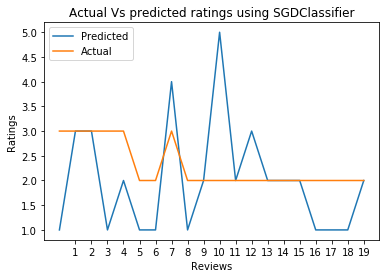

In [16]:
lim = 119990
plt.plot(ytestpred[lim:lim+20], label = 'Predicted')
plt.plot(ytest[lim:lim+20], label = 'Actual')
plt.legend(loc = 'upper left')
plt.xlabel("Reviews")
plt.ylabel("Ratings")
plt.xticks(np.arange(1,20))
plt.title("Actual Vs predicted ratings using SGDClassifier")

### LinearSVC

In [22]:
linearSVclf = Pipeline(steps=[('classify', get_classifier("SVC"))])
linearSVclf.fit(xtrain_tfidf, ytrain) 
ypred = linearSVclf.predict(xval_tfidf)
print(f"The predictions are {ypred}")
print("Model performance analysis with validation data")
evaluate_model(yval, ypred) 

The predictions are [4 1 5 ... 1 1 3]
Model performance analysis with validation data
Mean squared error: 0.8243402028350236
root mean squared error: 0.9079318271957557
Mean absolute error: 0.5314210951757932
r2 score: 0.5898549848097445
rmse score:0.9079318271957557


(0.9079318271957557,
 0.8243402028350236,
 0.5314210951757932,
 0.5898549848097445)

In [23]:
#xtestvec = applytfidfVectorizer(xtest) #vectorizing the test dataset
ytestpred = linearSVclf.predict(xtest_tfidf)
print(f"The predictions are {ytestpred}")
print("Model performance analysis with test data")
evaluate_model(ytest, ytestpred)

The predictions are [5 5 5 ... 2 1 2]
Model performance analysis with test data
Mean squared error: 0.8316210540351345
root mean squared error: 0.9119325929229279
Mean absolute error: 0.5359578652621754
r2 score: 0.5841894729824327
rmse score:0.9119325929229279


(0.9119325929229279,
 0.8316210540351345,
 0.5359578652621754,
 0.5841894729824327)

Text(0.5,1,'Actual Vs predicted ratings using LinearSVC')

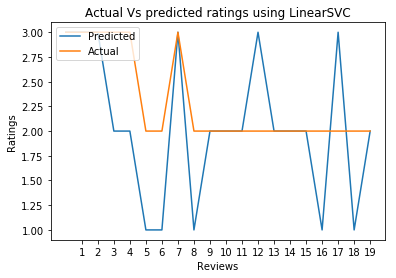

In [24]:
lim = 119990
plt.plot(ytestpred[lim:lim+20], label = 'Predicted')
plt.plot(ytest[lim:lim+20], label = 'Actual')
plt.legend(loc = 'upper left')
plt.xlabel("Reviews")
plt.ylabel("Ratings")
plt.xticks(np.arange(1,20))
plt.title("Actual Vs predicted ratings using LinearSVC")

### MLPClassifier

In [13]:
mlpclf = Pipeline(steps=[('scaler', StandardScaler(with_mean=False)),('classify', get_classifier("MLP"))])
mlpclf.fit(xtraindr, ytrain) 
ypred = mlpclf.predict(xvaldr)
print(f"The predictions are {ypred}")
print("Model performance analysis with validation data")
evaluate_model(yval, ypred)

The predictions are [3 1 1 ... 1 1 4]
Model performance analysis with validation data
Mean squared error: 2.043392028266902
root mean squared error: 1.4294726399154696
Mean absolute error: 0.9650663755531296
r2 score: -0.016676187320325386
rmse score:1.4294726399154696


(1.4294726399154696,
 2.043392028266902,
 0.9650663755531296,
 -0.016676187320325386)

In [14]:
#xtestvec = applytfidfVectorizer(xtest) #vectorizing the test dataset
ytestpred = mlpclf.predict(xtestdr)
print(f"The predictions are {ytestpred}")
print("Model performance analysis with test data")
evaluate_model(ytest, ytestpred)

The predictions are [4 3 1 ... 5 1 4]
Model performance analysis with test data
Mean squared error: 2.5404913497116572
root mean squared error: 1.5938918877112265
Mean absolute error: 1.18084602820094
r2 score: -0.2702456748558286
rmse score:1.5938918877112265


(1.5938918877112265, 2.5404913497116572, 1.18084602820094, -0.2702456748558286)

Text(0.5,1,'Actual Vs predicted ratings using MLPClassifier')

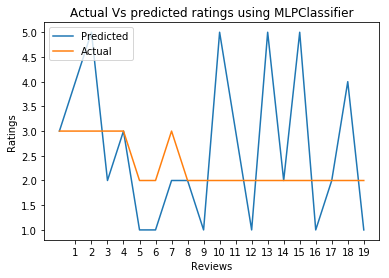

In [15]:
lim = 119990
plt.plot(ytestpred[lim:lim+20], label = 'Predicted')
plt.plot(ytest[lim:lim+20], label = 'Actual')
plt.legend(loc = 'upper left')
plt.xlabel("Reviews")
plt.ylabel("Ratings")
plt.xticks(np.arange(1,20))
plt.title("Actual Vs predicted ratings using MLPClassifier")